In [467]:
cd "D:\brAInTek\CVDL\OpenCV\02_coin_count"

D:\brAInTek\CVDL\OpenCV\02_coin_count


# Watershed Algorithm for image segmentation

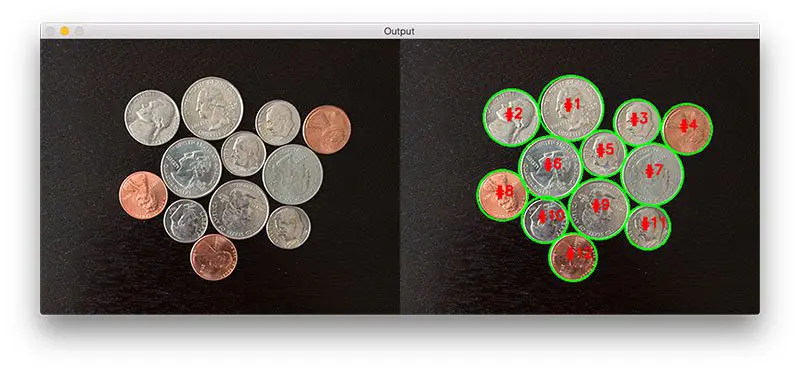
The watershed algorithm is a classic algorithm used for segmentation and is especially useful when extracting touching or overlapping objects in images, such as the coins in the figure above.

In [469]:
#import Libraries
import cv2
import imutils
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

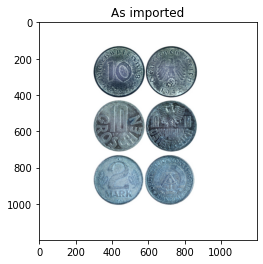

In [470]:
#image loading
image = cv2.imread("coin_set1.jpeg")
plt.title('As imported')
plt.imshow(image)

In [471]:
#image preprocessing
image_blur = cv2.medianBlur(image,25)

image_blur_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)

image_res ,image_thresh = cv2.threshold(image_blur_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


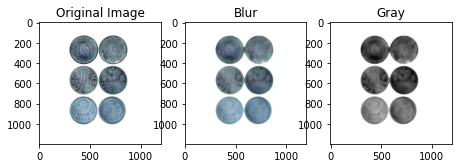

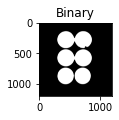

In [472]:
#Plot Image
plt.figure(figsize=(10,6))
plt.subplot(1,4,1)
plt.title('Original Image')
plt.imshow(image,cmap='gray')
plt.subplot(1,4,2)
plt.title('Blur')
plt.imshow(image_blur,cmap='gray')
plt.subplot(1,4,3)
plt.title('Gray')
plt.imshow(image_blur_gray,cmap='gray')
plt.show()
plt.subplot(1,4,4)
plt.title('Binary')
plt.imshow(image_thresh,cmap='gray')
plt.show()

In [473]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

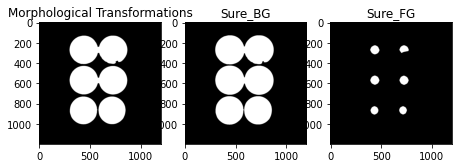

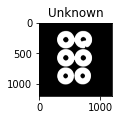

In [474]:
#Plot Image
plt.figure(figsize=(10,6))
plt.subplot(1,4,1)
plt.title('Morphological Transformations')
plt.imshow(opening,cmap='gray')
plt.subplot(1,4,2)
plt.title('Sure_BG')
plt.imshow(sure_bg,cmap='gray')
plt.subplot(1,4,3)
plt.title('Sure_FG')
plt.imshow(sure_fg,cmap='gray')
plt.show()
plt.subplot(1,4,4)
plt.title('Unknown')
plt.imshow(unknown,cmap='gray')
plt.show()


In [475]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown ==255] = 0

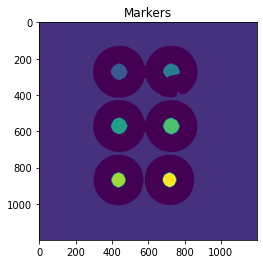

In [476]:
plt.title('Markers')
plt.imshow(markers)
plt.show()

In [477]:
markers = cv2.watershed(image,markers)
image[markers == -1] = [255,0,0]

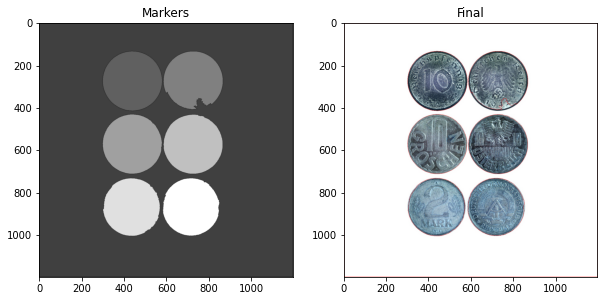

In [478]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Markers')
plt.imshow(markers,cmap='gray')
plt.subplot(1,2,2)
plt.title('Final')
plt.imshow(image,cmap='gray')


The watershed algorithm is a classic algorithm used for segmentation and is especially useful when extracting touching or overlapping objects in images, such as the coins in the figure above.

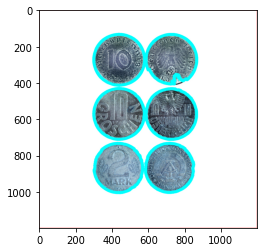

In [479]:
labels = np.unique(markers)
  
coins = []
for label in labels[2:]:  
  
# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background   
    target = np.where(markers == label, 255, 0).astype(np.uint8)
    
  # Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    coins.append(contours[0])
   
# Draw the outline
img = cv2.drawContours(image, coins, -1, color=(0, 255, 255), thickness=15)
   
plt.imshow(img,cmap='gray')


In [480]:
number_of_objects_in_image= len(coins)

print ("The number of objects in this image: ", str(number_of_objects_in_image))

The number of objects in this image:  6
